# Loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv(r'C:\Users\SUSHIL\Desktop\THE ALL PROJECTS\PROJECT NO. 5 - SUPER MARKET SALES\supermarket_sales - Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# Preprocessing the data

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
# Assumptions of Linear Regression
# 1) There should be no outliers present in the data
# 2) There should be a linear relationship between independent & dependent variables
# 3) The mean of residuals shoud be zero
# 4) Data should be normally distributed
# 5) There should not be multi colinearity between independent & Dependent variables


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Exploratory Data Analysis

In [9]:
bdf = ['cogs','gross margin percentage', 'gross income', 'Rating', 'Unit price', 'Tax 5%', 'Total']

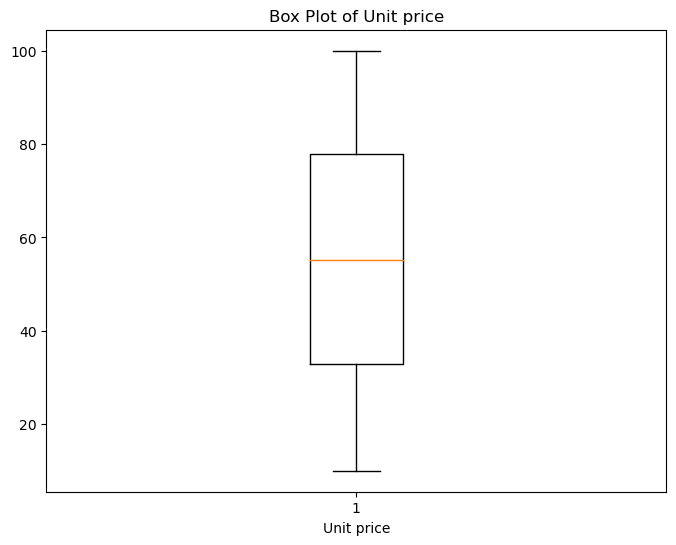

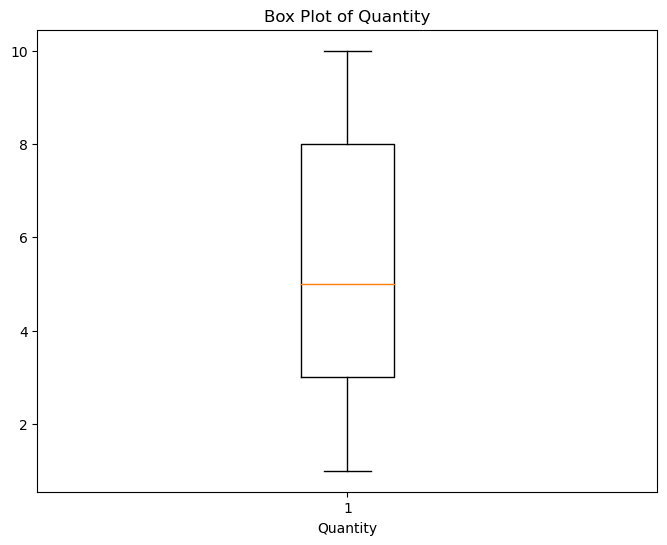

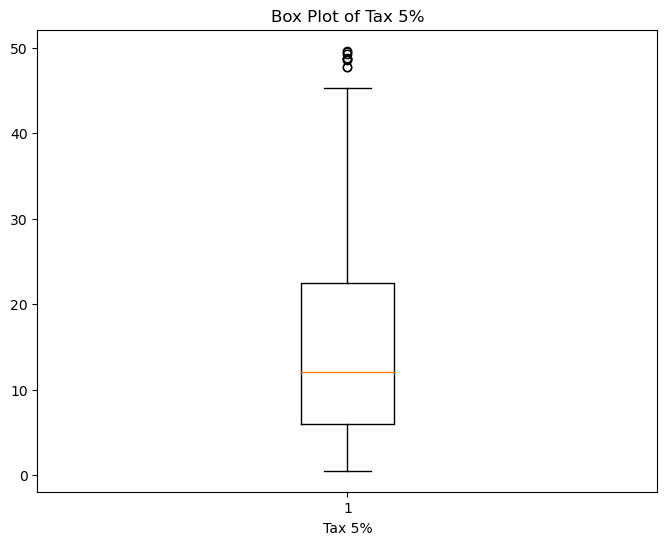

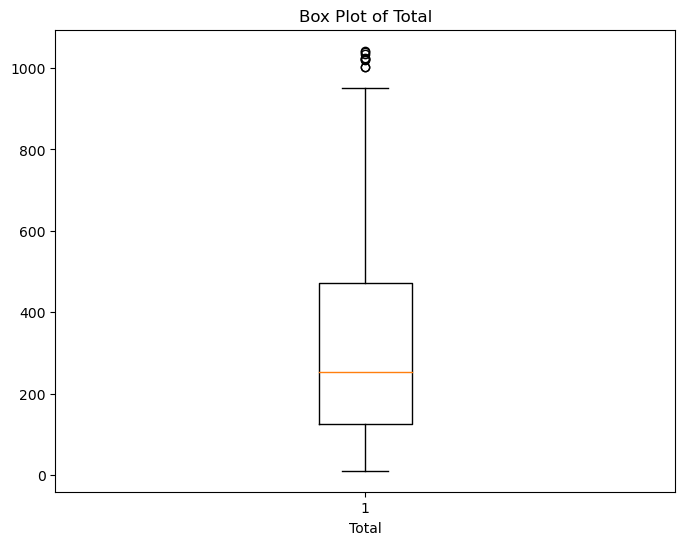

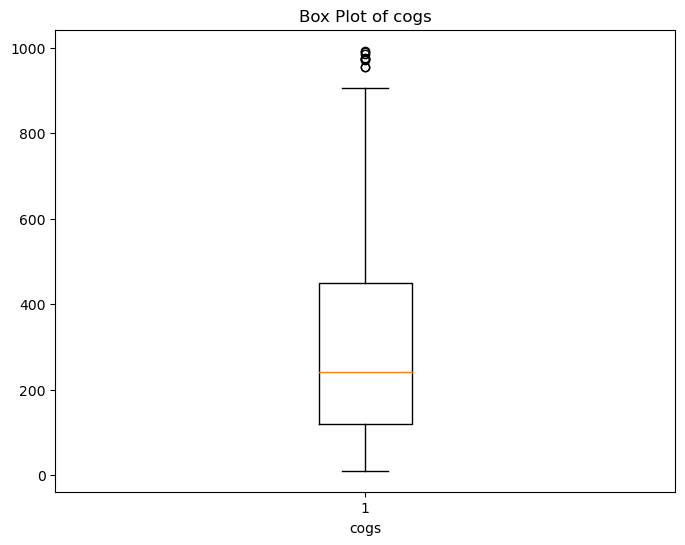

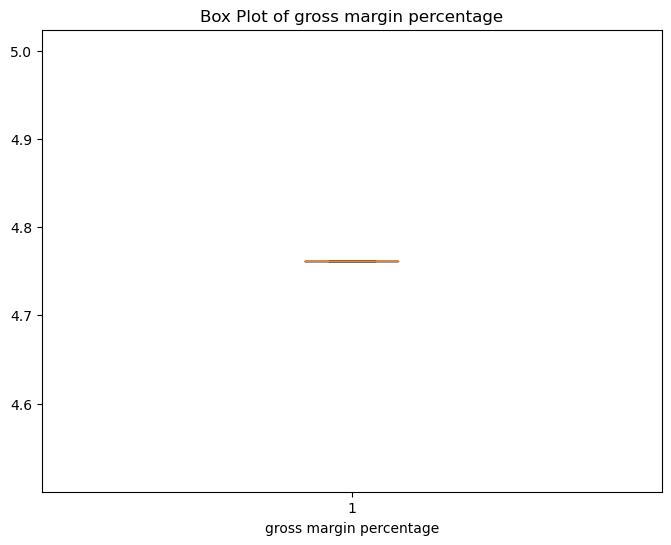

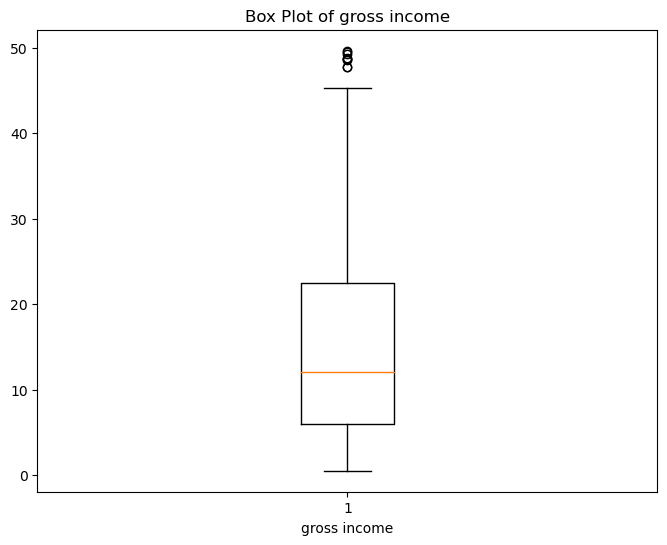

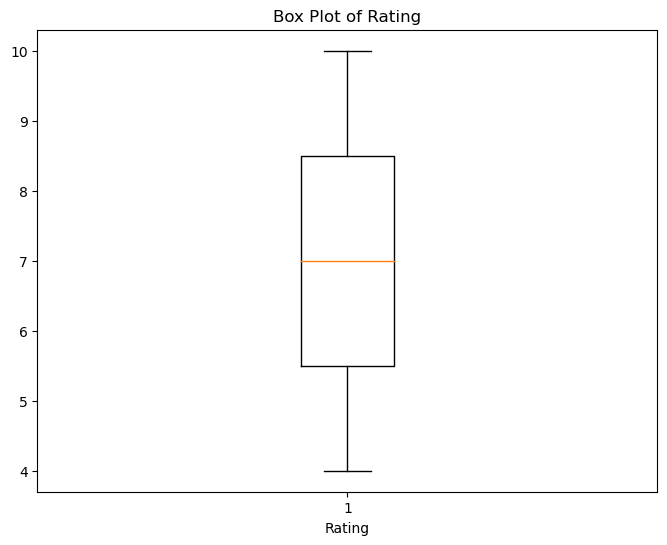

In [10]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Check if the column is numeric
        plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
        plt.boxplot(df[column], vert=True)  # Create a horizontal box plot
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.show()

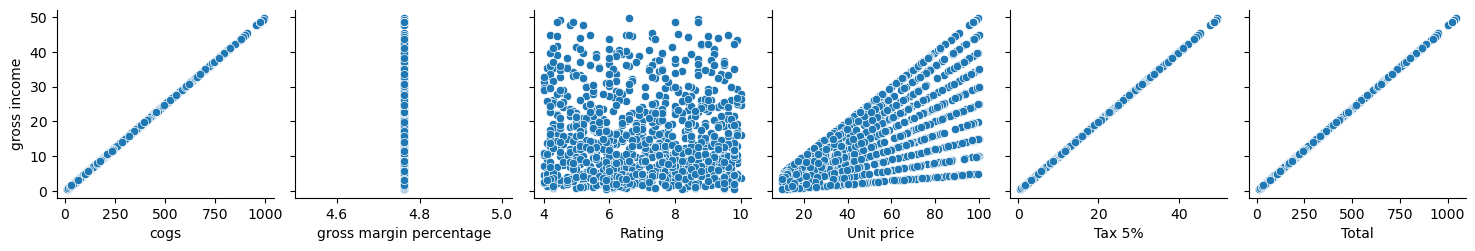

In [11]:
sns.pairplot(df, x_vars=['cogs','gross margin percentage', 'Rating', 'Unit price', 'Tax 5%', 'Total'], y_vars=['gross income'], kind='scatter')

# Show the plot
plt.show()

In [12]:
x = df[['cogs','gross margin percentage', 'Rating', 'Unit price', 'Tax 5%', 'Total']]
y = df['gross income']

In [13]:
Y_log=np.log(y) ## this transformation is used when the data is skewed 

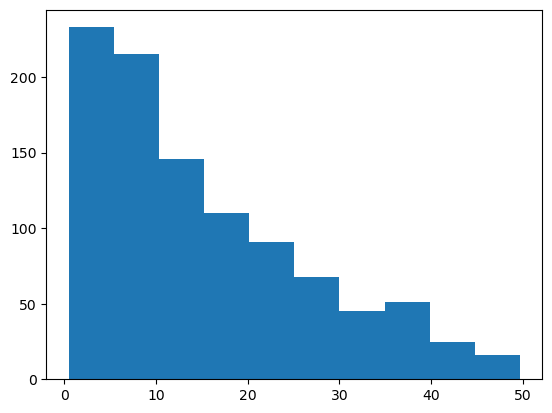

In [14]:
plt.hist(y)
plt.show()

                             cogs  gross margin percentage    Rating  \
cogs                     1.000000                      NaN -0.036442   
gross margin percentage       NaN                      NaN       NaN   
Rating                  -0.036442                      NaN  1.000000   
Unit price               0.633962                      NaN -0.008778   
Tax 5%                   1.000000                      NaN -0.036442   
Total                    1.000000                      NaN -0.036442   

                         Unit price    Tax 5%     Total  
cogs                       0.633962  1.000000  1.000000  
gross margin percentage         NaN       NaN       NaN  
Rating                    -0.008778 -0.036442 -0.036442  
Unit price                 1.000000  0.633962  0.633962  
Tax 5%                     0.633962  1.000000  1.000000  
Total                      0.633962  1.000000  1.000000  


<Axes: >

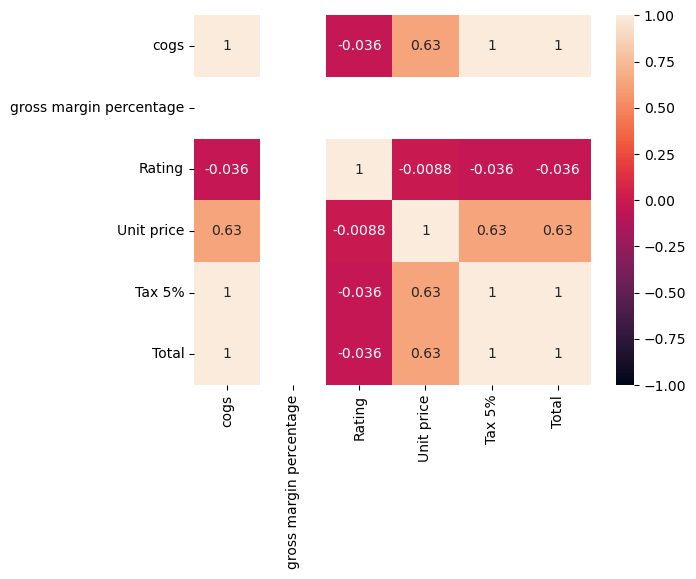

In [15]:
corr_df=x.corr(method='pearson')
print(corr_df)
 
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

# Building the model

In [16]:
from sklearn.model_selection import train_test_split
 
#split the data into  the test and train
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=10)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
## test_size is 20%  for less than 1000 obsevation and greater than 1000 30%

(800, 6)
(800,)
(200, 6)
(200,)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
x = df[['cogs','gross margin percentage', 'Rating', 'Unit price', 'Tax 5%', 'Total']]
y = df['gross income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print(f"Adjusted R Square : {adjusted_r_squared}")

# Visualize the decision tree (optional)
# from sklearn.tree import plot_tree

# plt.figure(figsize=(50, 6))
# plot_tree(model, feature_names=x.columns, filled=True)
# plt.show()


Mean Squared Error: 0.005339352500000016
R-squared: 0.9999638074021571
Adjusted R Square : 0.9999635887157653
